Task Details : Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests to classify transactions as fraudulent or legitimate.

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
df = pd.concat([pd.read_csv('fraudTrain.csv'),pd.read_csv('fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [26]:
pd.DataFrame(df.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,count
trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1852394


In [27]:
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0

df['gender'] = df['gender'].transform(gender_binarizer)

In [28]:
df2 = df.loc[:99999,df.dtypes!=object]
df2

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,1,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,2475085306462014,95.14,0,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,4005676619255478,8.75,0,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,3519232971341141,34.20,0,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,4040099974063068803,73.11,0,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


In [29]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

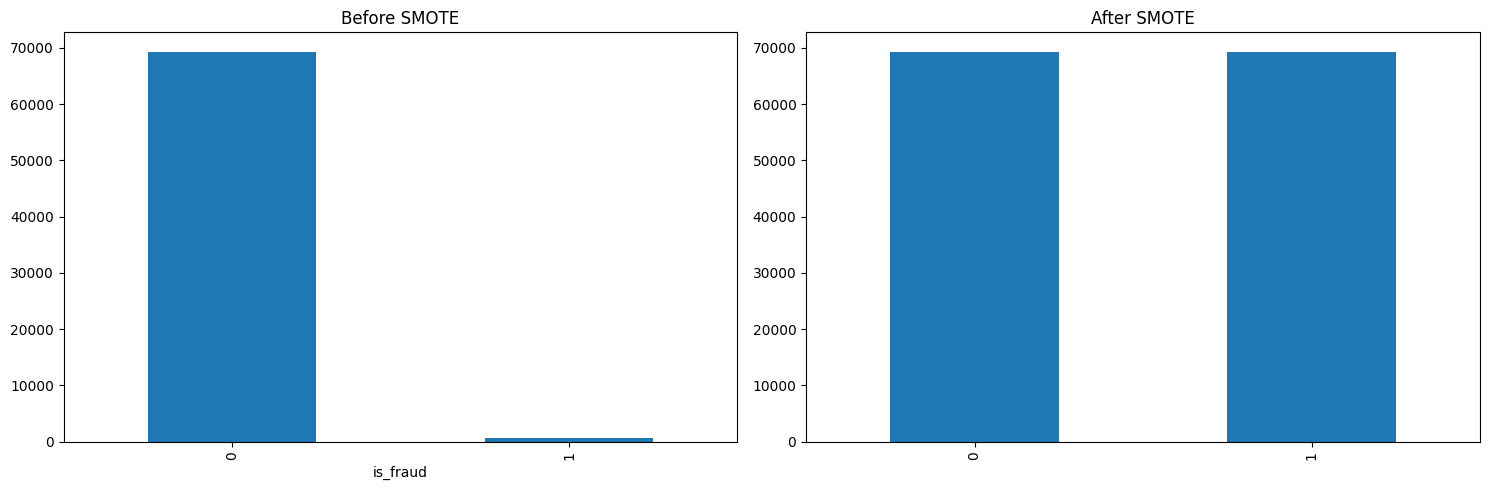

In [30]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.to_numpy())


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5)) # Effect of SMOTE over imbalanced datasets

ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.tight_layout()
plt.show()

In [31]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
algorithms = [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree ", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression())
]

In [33]:
results = {}  # Store the accuracy results

In [34]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

for algo_name, algo in algorithms:
    algo.fit(X_train, y_train)
    predictions = algo.predict(X_test)
    # print(predictions[:10])
    accuracy = accuracy_score(y_test, predictions)
    results[algo_name] = accuracy

for algo_name, accuracy in results.items():
    print(f"\n=== {algo_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions, zero_division=0))  


=== Random Forest ===
Accuracy: 0.9953
Confusion Matrix:
[[29661    37]
 [  302     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29698
           1       0.00      0.00      0.00       302

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000


=== Decision Tree  ===
Accuracy: 0.9905
Confusion Matrix:
[[29661    37]
 [  302     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29698
           1       0.00      0.00      0.00       302

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000


=== Logistic Regression ===
Accuracy: 0.9887
Confusion Matrix:
[[29661    37]
 [  302     0]]
Classification Report:
   

In [35]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
for i in range(51):
    sample = X_test[i].reshape(1, -1)  # reshaped to 2D
    prediction = model.predict(sample)
    print(f"Sample {i}: Predicted class label:", "Legit Transaction" if prediction[0] == 0 else "Fraudulent Transaction")


Sample 0: Predicted class label: Legit Transaction
Sample 1: Predicted class label: Legit Transaction
Sample 2: Predicted class label: Fraudulent Transaction
Sample 3: Predicted class label: Legit Transaction
Sample 4: Predicted class label: Legit Transaction
Sample 5: Predicted class label: Legit Transaction
Sample 6: Predicted class label: Legit Transaction
Sample 7: Predicted class label: Legit Transaction
Sample 8: Predicted class label: Legit Transaction
Sample 9: Predicted class label: Legit Transaction
Sample 10: Predicted class label: Legit Transaction
Sample 11: Predicted class label: Legit Transaction
Sample 12: Predicted class label: Legit Transaction
Sample 13: Predicted class label: Legit Transaction
Sample 14: Predicted class label: Legit Transaction
Sample 15: Predicted class label: Fraudulent Transaction
Sample 16: Predicted class label: Legit Transaction
Sample 17: Predicted class label: Legit Transaction
Sample 18: Predicted class label: Legit Transaction
Sample 19: P